In [1]:
#@title Data retrieval
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
    try:
        r = requests.get(url)
    except requests.ConnectionError:
    print("!!! Failed to download data !!!")
    else:
        if r.status_code != requests.codes.ok:
          print("!!! Failed to download data !!!")
        else:
            with open(fname, "wb") as fid:
                fid.write(r.content)

In [3]:
import numpy as np

In [5]:
dat=np.load('stringer_spontaneous.npy',allow_pickle=True)

In [10]:
dat.item()['sresp'].shape

(11983, 7018)

In [11]:
from sklearn.decomposition import PCA

In [14]:
pca=PCA(n_components=10)
pcs=pca.fit_transform(dat.item()['sresp'].T)
print(pcs.shape)

(7018, 10)


In [17]:
x=[]
y=[]
for j in range(0,5000):
    x.append(pcs[j,:].flatten())
    y.append(pcs[j+1,:].flatten())

In [20]:
x_test=[]
y_test=[]
for j in range(5000,7000):
    x_test.append(pcs[j,:].flatten())
    y_test.append(pcs[j+1,:].flatten())

In [18]:
x=np.array(x)
y=np.array(y)
print(x.shape)

(5000, 10)


In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.470741425670049

In [21]:
reg.score(x_test,y_test)

0.47756974888944087

In [28]:
y_pred=reg.predict(x_test)

In [32]:
from sklearn.metrics import explained_variance_score

print(explained_variance_score(pcs[5000:7000],y_pred))

0.8504021525382995


# In two dimensions

In [39]:
pca=PCA(n_components=2)
pcs=pca.fit_transform(dat.item()['sresp'].T)
print(pcs.shape)

x_test=[]
y_test=[]
for j in range(5000,7000):
    x_test.append(pcs[j,:].flatten())
    y_test.append(pcs[j+1,:].flatten())

x=[]
y=[]
for j in range(0,5000):
    x.append(pcs[j,:].flatten())
    y.append(pcs[j+1,:].flatten())
    
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
reg.score(x, y)

y_pred=reg.predict(x_test)

from sklearn.metrics import explained_variance_score

print(explained_variance_score(pcs[5000:7000],y_pred))

(7018, 2)
0.952630341053009


In [40]:
reg.coef_

array([[0.8596695 , 0.00177585],
       [0.0512902 , 0.7396366 ]], dtype=float32)

In [43]:
y_preds=[]
for j in range(0,2000):
    y_pred=reg.coef_@x_test[j]
    y_preds.append(y_pred)

In [46]:
y_preds=np.array(y_preds)

In [47]:
y_preds.shape

(2000, 2)

In [49]:
y_test=np.array(y_test)

In [54]:
np.corrcoef(y_preds.T,y_test.T)

array([[ 1.        , -0.00547977,  0.88306398, -0.05977963],
       [-0.00547977,  1.        , -0.01626914,  0.71692525],
       [ 0.88306398, -0.01626914,  1.        , -0.09404062],
       [-0.05977963,  0.71692525, -0.09404062,  1.        ]])

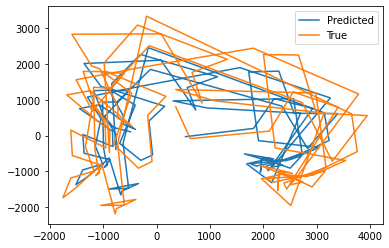

In [52]:
import matplotlib.pyplot as plt

plt.plot(y_preds[:100,0],y_preds[:100,1],label='Predicted')
plt.plot(y_test[:100,0],y_test[:100,1],label='True')
plt.legend()